In [129]:
import os

In [130]:
os.chdir(r"C:\Users\yozhan\cryptocurrency")

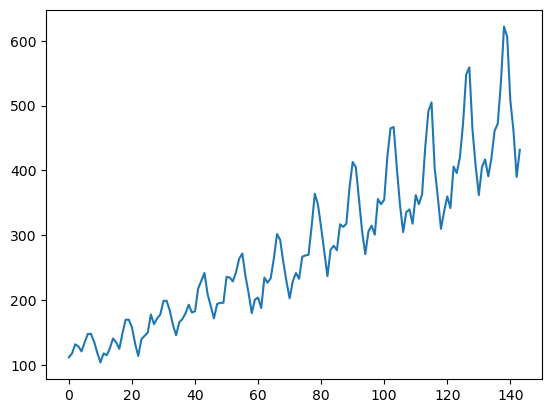

In [131]:
import matplotlib.pyplot as plt
import pandas as pd
 
df = pd.read_csv(r'.\tutorial\airline-passengers.csv')
timeseries = df[["Passengers"]].values.astype('float32')
 
plt.plot(timeseries)
plt.show()

In [132]:
# train-test split for time series
train_size = int(len(timeseries) * 0.67)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]

In [134]:
import torch
 
def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset
    
    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

In [135]:
lookback = 4
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# window sample, time steps, features

torch.Size([92, 4, 1]) torch.Size([92, 4, 1])
torch.Size([44, 4, 1]) torch.Size([44, 4, 1])


In [88]:
import torch.nn as nn
 
class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        #input_size: how many features (currently only 1, the time series from previous days)
        #if more features are used (for example, text features, sentiment scores, then input_size should be larger)
        
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = x[:, -1:, :]
        x = self.linear(x)
        return x

In [118]:
import numpy as np
import torch.optim as optim
import torch.utils.data as data

model = AirModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 2000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:        
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch[:, -1:, :])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred[:, -1:, :], y_train[:, -1:, :]))
        
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred[:, -1:, :], y_test[:, -1:, :]))
        
        
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

tensor([[[-0.0012]],

        [[-0.0018]],

        [[-0.0031]],

        [[-0.0038]],

        [[-0.0051]],

        [[-0.0065]],

        [[-0.0060]],

        [[-0.0040]],

        [[-0.0023]],

        [[-0.0014]],

        [[-0.0009]],

        [[-0.0018]],

        [[-0.0021]],

        [[-0.0023]],

        [[-0.0033]],

        [[-0.0039]],

        [[-0.0053]],

        [[-0.0070]],

        [[-0.0065]],

        [[-0.0045]],

        [[-0.0026]],

        [[-0.0019]],

        [[-0.0017]],

        [[-0.0027]],

        [[-0.0037]],

        [[-0.0042]],

        [[-0.0051]],

        [[-0.0052]],

        [[-0.0061]],

        [[-0.0077]],

        [[-0.0078]],

        [[-0.0066]],

        [[-0.0052]],

        [[-0.0047]],

        [[-0.0047]],

        [[-0.0052]],

        [[-0.0052]],

        [[-0.0055]],

        [[-0.0059]],

        [[-0.0060]],

        [[-0.0067]],

        [[-0.0081]],

        [[-0.0082]],

        [[-0.0077]]])
Epoch 0: train RMSE 228.7690, te

tensor([[[281.4232]],

        [[281.4534]],

        [[281.4724]],

        [[280.6501]],

        [[277.5331]],

        [[281.3636]],

        [[281.4219]],

        [[280.3969]],

        [[281.3496]],

        [[281.3743]],

        [[281.0114]],

        [[281.4743]],

        [[281.4233]],

        [[281.4751]],

        [[281.4134]],

        [[276.6275]],

        [[257.9320]],

        [[281.1812]],

        [[281.4659]],

        [[280.6869]],

        [[281.3572]],

        [[281.4681]],

        [[281.3878]],

        [[281.4991]],

        [[281.5027]],

        [[281.4759]],

        [[280.1986]],

        [[252.8920]],

        [[252.1630]],

        [[272.4238]],

        [[281.1440]],

        [[281.4727]],

        [[281.5000]],

        [[281.4819]],

        [[281.5016]],

        [[281.4789]],

        [[280.8569]],

        [[277.1184]],

        [[253.5120]],

        [[251.3479]],

        [[251.6234]],

        [[254.7992]],

        [[273.3949]],

        [[2

tensor([[[323.0790]],

        [[346.4754]],

        [[369.0224]],

        [[369.9098]],

        [[370.0675]],

        [[365.8755]],

        [[304.4727]],

        [[267.3923]],

        [[363.0748]],

        [[337.0964]],

        [[299.6556]],

        [[366.7579]],

        [[320.8776]],

        [[353.8323]],

        [[369.3964]],

        [[370.0785]],

        [[360.8098]],

        [[368.8663]],

        [[322.5965]],

        [[264.4662]],

        [[362.4104]],

        [[356.9080]],

        [[314.5428]],

        [[368.7957]],

        [[359.4282]],

        [[367.1651]],

        [[370.0035]],

        [[347.1830]],

        [[327.2666]],

        [[367.7557]],

        [[366.7428]],

        [[326.6451]],

        [[366.6502]],

        [[366.4575]],

        [[356.1996]],

        [[367.1345]],

        [[369.8420]],

        [[370.0779]],

        [[357.8181]],

        [[326.6190]],

        [[326.7762]],

        [[339.2241]],

        [[368.4189]],

        [[3

torch.Size([92, 4, 1])
torch.Size([92, 1, 1])


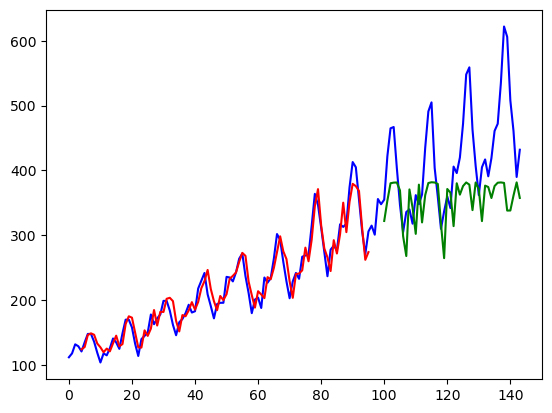

In [119]:
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_train)
    print(y_train.shape)
    print(y_pred.shape)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train)[:, -1, :]
    # shift test predictions for plotting
    test_plot = np.ones_like(timeseries) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1, :]
# plot
plt.plot(timeseries, c='b')
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')
plt.show()

In [ ]:
# What about change the loss function to only calculate the loss of the last day instead of "t+1" to "last"

In [126]:
lookback = 4
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# window sample, time steps, features

torch.Size([92, 4, 1]) torch.Size([92, 4, 1])
torch.Size([44, 4, 1]) torch.Size([44, 4, 1])


In [127]:
import numpy as np
import torch.optim as optim
import torch.utils.data as data

model = AirModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 2000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:        
        y_pred = model(X_batch)
        
        #print(y_pred.shape, y_batch[:, -1:, :].shape)
        
        loss = loss_fn(y_pred, y_batch[:, -1:, :])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred[:, -1:, :], y_train[:, -1:, :]))
        
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred[:, -1:, :], y_test[:, -1:, :]))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

Epoch 0: train RMSE 228.6444, test RMSE 427.8196
Epoch 100: train RMSE 177.5015, test RMSE 374.2199
Epoch 200: train RMSE 139.2243, test RMSE 332.4014
Epoch 300: train RMSE 108.1478, test RMSE 295.5206
Epoch 400: train RMSE 83.7063, test RMSE 262.5800
Epoch 500: train RMSE 62.6433, test RMSE 229.9568
Epoch 600: train RMSE 48.2779, test RMSE 202.7041
Epoch 700: train RMSE 38.3032, test RMSE 178.9147
Epoch 800: train RMSE 31.8134, test RMSE 161.1139
Epoch 900: train RMSE 28.0495, test RMSE 153.1569
Epoch 1000: train RMSE 25.8689, test RMSE 141.5045
Epoch 1100: train RMSE 24.1666, test RMSE 131.8886
Epoch 1200: train RMSE 23.4076, test RMSE 123.2945
Epoch 1300: train RMSE 22.8624, test RMSE 121.8842
Epoch 1400: train RMSE 22.0898, test RMSE 116.9426
Epoch 1500: train RMSE 21.5784, test RMSE 113.0219
Epoch 1600: train RMSE 21.0006, test RMSE 110.8304
Epoch 1700: train RMSE 20.2231, test RMSE 108.0340
Epoch 1800: train RMSE 19.9500, test RMSE 106.6506
Epoch 1900: train RMSE 19.0664, test RM

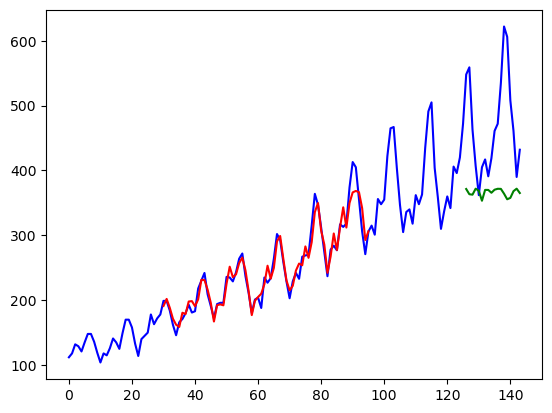

In [125]:
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train)[:, -1, :]
    # shift test predictions for plotting
    test_plot = np.ones_like(timeseries) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1, :]
# plot
plt.plot(timeseries, c='b')
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')
plt.show()